In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)


%matplotlib inline

In [2]:
#read in

df = pd.read_csv('driver and effector control_background subtracted formatted.csv', comment = '#')
df.head()

,K1N,ISHW351-2,syIs300,ISHW334-3
0,7.456980,10327.956610,17.084257,9182.116084
1,4.951350,12989.338110,10.382119,10618.014370
2,4.702167,14797.692060,15.118900,8043.155039
3,4.376589,8648.279922,11.010611,7296.286660
4,3.064479,11488.385150,9.675050,5535.547171


In [3]:
df2 = pd.melt(df, value_vars = list(df.columns), var_name = 'genotype', value_name = 'fluo')
df2.dropna(inplace = True)
df_tidy = df2.reset_index(drop = True)
df_tidy.head()

,genotype,fluo
0,K1N,7.456980
1,K1N,4.951350
2,K1N,4.702167
3,K1N,4.376589
4,K1N,3.064479


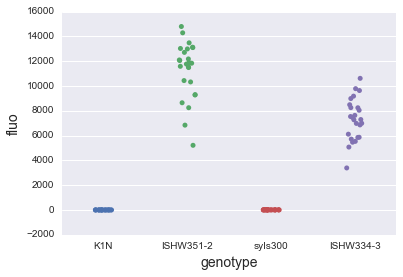

In [4]:
sns.stripplot(data = df_tidy, x = 'genotype', y = 'fluo', jitter = True)


#### 

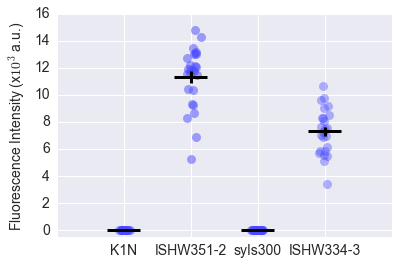

In [8]:
#### 
x= np.random.normal(1, .05, len(df_tidy.loc[df_tidy['genotype'] == 'K1N']))
x1= np.random.normal(2, .05, len(df_tidy.loc[df_tidy['genotype'] == 'ISHW351-2']))
x2= np.random.normal(3, .05, len(df_tidy.loc[df_tidy['genotype'] == 'syIs300']))
x3= np.random.normal(4, .05, len(df_tidy.loc[df_tidy['genotype'] == 'ISHW334-3']))
xs = [x, x1, x2, x3]
y= df_tidy.loc[df_tidy['genotype'] == 'K1N'].fluo
y1= df_tidy.loc[df_tidy['genotype'] == 'ISHW351-2'].fluo
y2= df_tidy.loc[df_tidy['genotype'] == 'syIs300'].fluo
y3= df_tidy.loc[df_tidy['genotype'] == 'ISHW334-3'].fluo
ys = [y, y1, y2, y3]
yy = []
for f in ys:
    yy.append(f/1000)
##for iterative plotting
#for a, b in zip(xs, ys):
#    plt.plot(a, b, 'o', color= '#f08073', alpha= .7, zorder = 1)

plt.plot(x, yy[0], 'o', color= '#4a4bff', alpha= .5, zorder = 1, ms = 9)
plt.plot(x1, yy[1], 'o', color= '#4a4bff', alpha= .5, zorder = 1, ms = 9)
plt.plot(x2, yy[2], 'o', color= '#4a4bff', alpha= .5, zorder = 1, ms = 9)
plt.plot(x3, yy[3], 'o', color= '#4a4bff', alpha= .4, zorder = 1, ms = 9)

bardelta = 0.25
for j in range(len(yy)):
    plt.hlines(yy[j].mean(), xmin = j+1-bardelta, 
               xmax = j+1+bardelta, lw = 3, zorder = 3)
    plt.errorbar(j+1, yy[j].mean(), yerr=yy[j].sem(), fmt = '-',
             ecolor = 'black', capsize = 0, elinewidth  = 3, 
             barsabove = True, zorder = 2)

# to set x labels
plt.gca().set_xticks(np.arange(6))
labels= ['', 'K1N', 'ISHW351-2', 'syIs300', 'ISHW334-3', '']
plt.gca().set_xticklabels(labels, fontsize = 14)

plt.ylim(-0.5, 16)
plt.ylabel('Fluorescence Intensity (x$10^3$ a.u.)', fontsize = 14)
plt.gca().tick_params(axis= 'y', labelsize = 14)

#saves in currrent directory
# plt.savefig('figS3.pdf')
plt.show()
plt.close()